# Import python scripts

In [26]:
# imports.py
%run -i 'imports.py'

# imports.py
%run -i 'preprocessing.py'

# utils.py
%run -i 'utils.py'

# DeltaCon.py
%run -i 'DeltaCon.py'


In [2]:
path = '/Users/Bryan/Documents/Cours_local/MLNS/'
filepath_full_data = path + 'Data/Jan19-31.csv'
savepath = path + 'Data/'

# Preprocessing

## Create a conversion table that maps wallets to a single index

In [3]:
full_df, conversion_df = wal_conversion_table(filepath_full_data, savepath)

  0%|          | 0/8125454 [00:00<?, ?it/s]

Number of sources: 2,022,551
Number of targets: 2,560,511
Number of wallets: 3,112,764


## Preprocess dataframes

In [4]:
# Load conversion table
conversion_df = pd.read_csv(savepath + 'conversion_df.csv')

# Load csv files
Jan19_31 = pd.read_csv(savepath + 'Jan19-31.csv')

In [7]:
Jan19_31_clean = preprocessing(Jan19_31, conversion_df)

In [8]:
Jan19_31_clean

,from_address_idx,to_address_idx,value_eth,gas_price_eth,receipt_gas_used_eth,block_timestamp_true
0,693061,1660284,0.105000,1.731913e-07,1.883960e-13,2022-01-21 01:09:11
1,1393535,1229806,0.030000,1.389635e-07,2.132120e-13,2022-01-21 06:52:46
2,1373817,2340407,0.250000,1.863264e-07,4.503800e-14,2022-01-21 02:16:07
3,1307110,1596705,0.250000,1.439465e-07,9.470600e-14,2022-01-21 18:45:15
4,1943030,482388,0.150000,7.681043e-08,5.221710e-13,2022-01-21 12:26:16
...,...,...,...,...,...,...
8125449,1587629,1014644,0.225500,1.416767e-07,2.100000e-14,2022-01-27 19:42:36
8125450,2345714,2914477,0.033584,1.234891e-07,2.100000e-14,2022-01-27 09:17:38
8125451,795581,2255951,0.300000,1.798086e-07,2.100000e-14,2022-01-27 17:51:02
8125452,2712630,983838,0.540000,2.458474e-07,2.100000e-14,2022-01-27 17:59:38


# Create dataframe for each timeframe

##  Create lists with storing dates as strings and datatimes

In [11]:
x = datetime.strptime('2022-01-20 16:00:00', '%Y-%m-%d %H:%M:%S')

list_timelines = []
list_datetime = []

n = 96

for i in tqdm(range(0, n)):
    dt = x + timedelta(hours=i)
    list_datetime.append(dt)
    list_timelines.append(dt.strftime('%Y-%m-%d %H:%M:%S'))

  0%|          | 0/96 [00:00<?, ?it/s]

In [12]:
# Get the file_names
file_names = []

for i in tqdm(range(0, n)):
    
    dt = list_datetime[i]
    file_names.append('2022_0' + str(dt.month) + '_' + str(dt.day) + '_' + str(dt.hour) + '.csv')

  0%|          | 0/96 [00:00<?, ?it/s]

## Generate csv

In [ ]:
for i in tqdm(range(len(list_timelines)-1)):
    
    # Generate the dataframe
    df = df_full[(df_full['block_timestamp_true'] >= list_timelines[i]) & (df_full['block_timestamp_true'] < list_timelines[i+1])]
    
    # Get the datetimes
    dt = list_datetime[i]
    
    # Generate the names
    name_csv = '2022_0' + str(dt.month) + '_' + str(dt.day) + '_' + str(dt.hour) + '.csv'
    
    # save the csv to the save path
    df.to_csv(savepath+ name_csv, sep = ',', index = False)
    

# Anomaly Detection

## Compute Similarities

In [29]:
similarity = sim_computation(list_timelines)

In [19]:
# create the dataframe
similarities_df = pd.DataFrame(list(zip(list_timelines[:-2], similarity)), 
                               columns =['time', 'similarity'])

In [20]:
# Fill nan values with the mean

similarities_df['similarity'].fillna(value=np.mean(similarities_df['similarity']), inplace=True)

In [ ]:
# Save the dataframe
with open(savepath + 'anomaly_detection/similarities_df.pkl', 'wb') as f:
  pickle.dump(similarities_df, f)

In [24]:
# Load the similarity dataframe

similarities_df = pickle.load(open(savepath +'anomaly_detection/similarities_df.pkl', 
                                   'rb'))

## Plot the observations

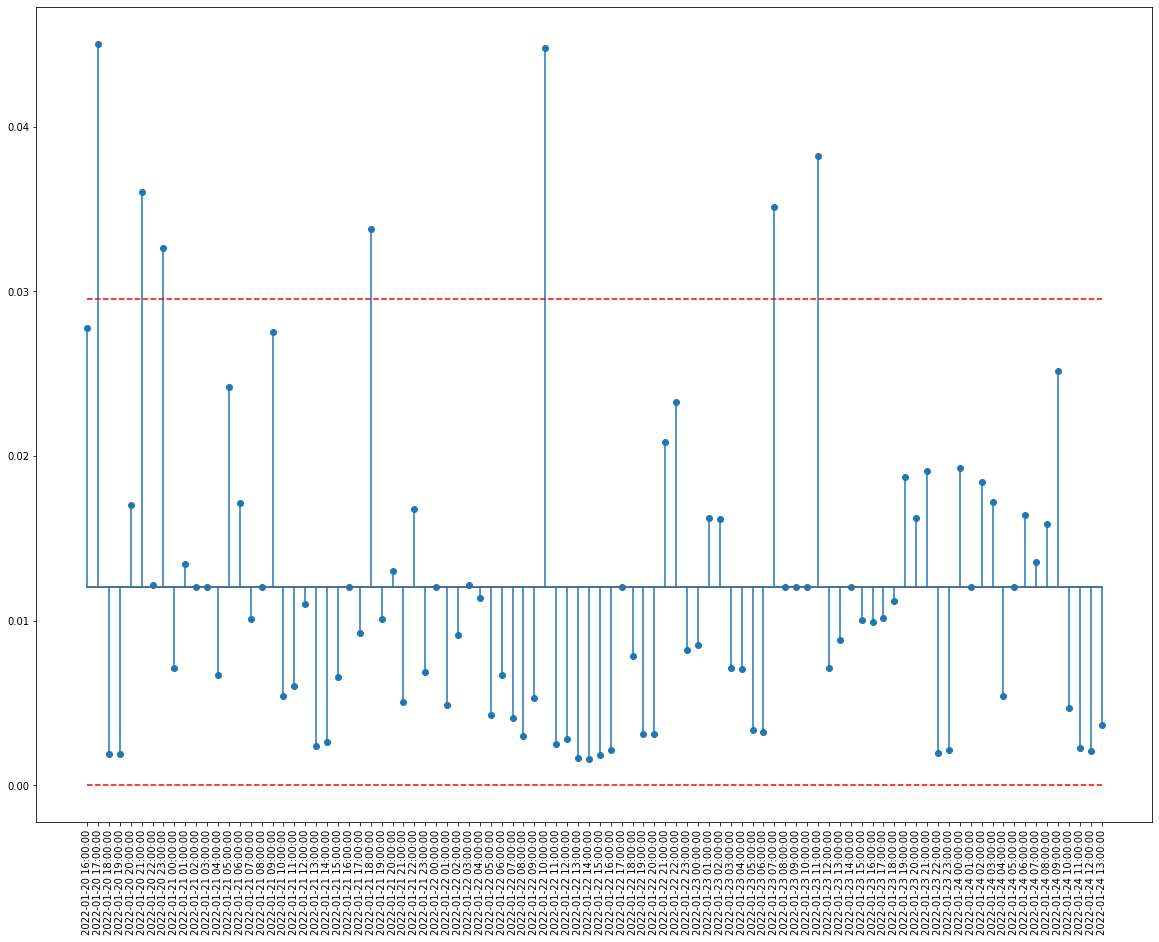

In [27]:
lollipop_chart(similarities_df, k=2)

In [30]:
similarities_df.similarity.describe()

count    94.000000
mean      0.012058
std       0.009747
min       0.001629
25%       0.004917
50%       0.010149
75%       0.016222
max       0.045021
Name: similarity, dtype: float64